In [121]:
### read ISSI files from Emma for October 2024 event


In [122]:
import pickle
import os
import numpy as np
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from heliocats import data as hd
import copy

data_path='/Users/chris/python/data/ISSI/'

#data_path='/Users/chris/python/data/may_2024_events/'


#Plotly imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
pio.renderers.default = 'browser'

print(' ' )

In [138]:
#file=data_path+'wind_october2024_timeshifted_5min_30RE.txt'
#file=data_path+'wind_october2024_timeshifted_5min_40RE.txt'
file=data_path+'wind_october2024_timeshifted_5min_60RE.txt'


#file=data_path+'wind_october2024_timeshifted_2min_30RE.txt'

# Define the column names
column_names = ['year', 'month', 'day', 'hour', 'min', 'sec', 'msec', 
                'bx', 'by', 'bz', 'vx', 'vy', 'vz', 'np', 'tp']

# Load the data with genfromtxt, which handles mixed data types better
data = np.genfromtxt(file, 
                     names=column_names,
                     dtype=None,  # Auto-detect data types
                     encoding=None)  # Handle text encoding
print(data['year'])
print(data['day'])
print(data['hour'])
print(data['min'])
print(data['sec'])
print(data['msec'])


data['tp']=data['tp']*(1.602176634*1e-19)/(1.38064852*1e-23)
print((1.602176634*1e-19)/(1.38064852*1e-23))

dates = []
for y, m, d, h, mn, s in zip(data['year'], data['month'], data['day'], 
                                 data['hour'], data['min'], data['sec']):
    # Convert all to integers
    year = int(y)
    month = int(m)
    day = int(d)
    hour = int(h)
    minute = int(mn)
    second = int(s)
    
    # Create the datetime object with full timestamp
    dt = datetime(year=year, month=month, day=day, 
                  hour=hour, minute=minute, second=second)
    dates.append(dt)
    
    
    

[2024. 2024. 2024. ... 2024. 2024. 2024.]
[ 1.  1.  1. ... 16. 16. 16.]
[0. 0. 0. ... 0. 0. 0.]
[22. 27. 32. ...  9. 14. 19.]
[22. 22. 22. ... 43. 43. 43.]
[612075. 612075. 612075. ... 139851. 139851. 139851.]
11604.522156008252


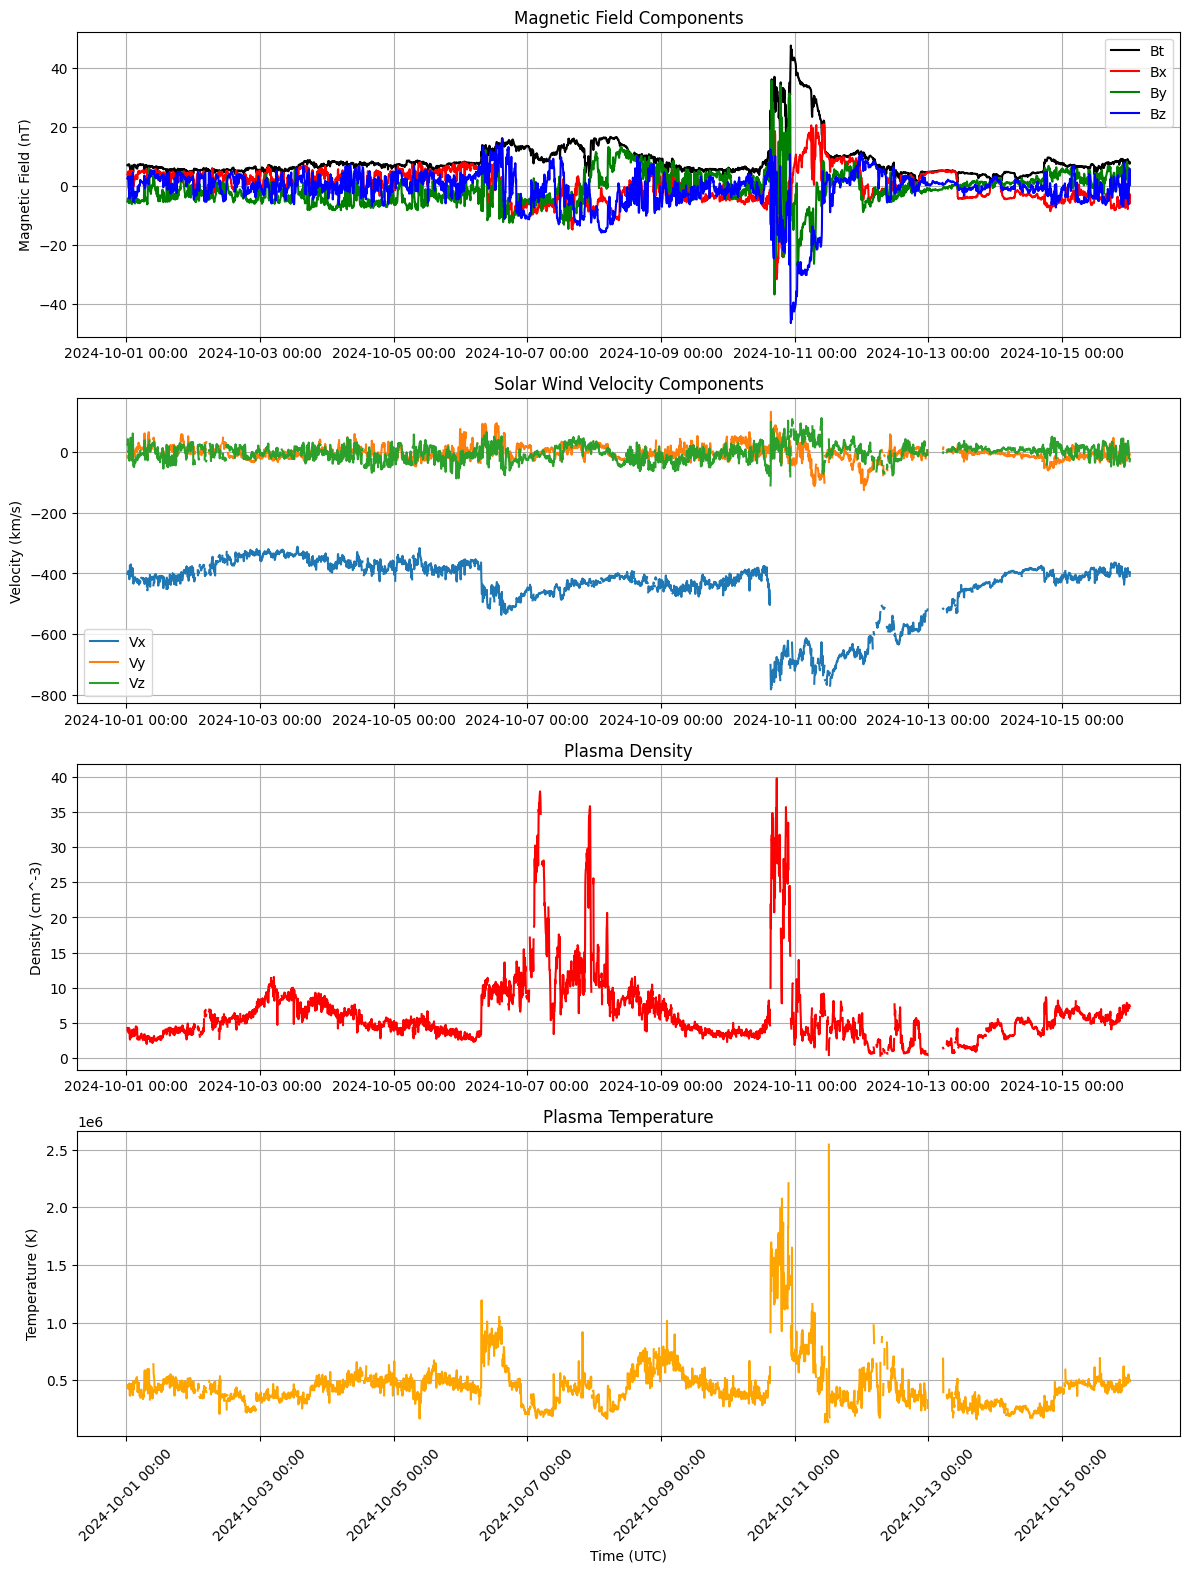

In [139]:
# Set up the figure with multiple subplots
plt.figure(figsize=(12, 15))

bt=np.sqrt(data['bx']**2+data['by']**2+data['bz']**2)

# Plot 1: Magnetic field components
plt.subplot(4, 1, 1)
plt.plot(dates, bt,'-k', label='Bt')
plt.plot(dates, data['bx'],'-r', label='Bx')
plt.plot(dates, data['by'],'-g', label='By')
plt.plot(dates, data['bz'],'-b', label='Bz')
plt.ylabel('Magnetic Field (nT)')
plt.legend()
plt.title('Magnetic Field Components')
plt.grid(True)

# Plot 2: Solar wind velocity
plt.subplot(4, 1, 2)
plt.plot(dates, data['vx'], label='Vx')
plt.plot(dates, data['vy'], label='Vy')
plt.plot(dates, data['vz'], label='Vz')
plt.ylabel('Velocity (km/s)')
plt.legend()
plt.title('Solar Wind Velocity Components')
plt.grid(True)

# Plot 3: Plasma density
plt.subplot(4, 1, 3)
plt.plot(dates, data['np'], 'r-')
plt.ylabel('Density (cm^-3)')
plt.title('Plasma Density')
plt.grid(True)

# Plot 4: Temperature
plt.subplot(4, 1, 4)
plt.plot(dates, data['tp'], 'orange')
plt.ylabel('Temperature (K)')
plt.xlabel('Time (UTC)')
plt.title('Plasma Temperature')
plt.grid(True)

# Format x-axis for all subplots
for i in range(1, 5):
    plt.subplot(4, 1, i)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Adjust layout and show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('oct_2024_for_sim.png', dpi=300)
plt.show()


In [140]:
nrows=4
#init_notebook_mode(connected = True)
#init_notebook_mode(connected = False)

#fig=plt.figure(figsize=(10,6), dpi=150)
fig = make_subplots(rows=nrows, cols=1, shared_xaxes=True,row_heights=[0.3,0.2, 0.2, 0.2])


#for column, color in zip(['b_x', 'b_y', 'b_z', 'b_tot'], ['red', 'green', 'blue', 'black']):
fig.add_trace(go.Scatter(x=dates, y=data['bx'], name='Bx',line_color='red'), row=1, col=1)
fig.update_yaxes(title_text="B [nT] RTN", row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=data['by'], name='By',line_color='green'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=data['bz'], name='Bz',line_color='blue'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=bt, name='Bt',line_color='black'), row=1, col=1)

fig.add_trace(go.Scatter(x=dates, y=data['vx'], name='Vx',line_color='black'), row=2, col=1)
fig.update_yaxes(title_text="V [km/s]", row=2, col=1)

fig.add_trace(go.Scatter(x=dates, y=data['np'], name='Np',line_color='black'), row=3, col=1)
fig.update_yaxes(title_text="Np [ccm-3]", row=3, col=1)

fig.add_trace(go.Scatter(x=dates, y=data['tp'], name='Tp',line_color='black'), row=4, col=1)
fig.update_yaxes(title_text="Tp [K]", row=4, col=1)


fig.update_layout(title=file[30:])

#### save as vector graphics
fig.show(config = {
  'toImageButtonOptions': {
    'format': 'svg', 
    'filename': 'custom_image',
    'height': 800,
    'width': 1000,
    'scale':6, # Multiply title/legend/axis/canvas sizes by this factor
  }
})





fig.write_html(f'measure_issi.html')

In [141]:
file

'/Users/chris/python/data/ISSI/wind_october2024_timeshifted_5min_60RE.txt'

In [142]:
## plot non time shifted wind data over it for comparison, only total field